In [1]:
import cv2
import numpy as np
import pandas as pd
from tqdm import tqdm_notebook
import matplotlib.pyplot as plt

%matplotlib inline

### Write a function to show a specific frame for the video.

In [11]:
def show_frame(vid_file = '144p_Tutorial_Clair_de_Lune.mp4',
               frame_num = 0,
               color_space_conversion = None):
    cap = cv2.VideoCapture(vid_file)
    counter = 0
    while cap.isOpened() and counter <= frame_num:
        ret, current_frame = cap.read()
        if color_space_conversion is not None:
            current_frame = cv2.cvtColor(current_frame, color_space_conversion)
        if counter == frame_num:
#             cv2.imshow('current_frame', current_frame)
            plt.imshow(current_frame)
            plt.show()
        counter += 1
        
    cap.release()
    cv2.destroyAllWindows()

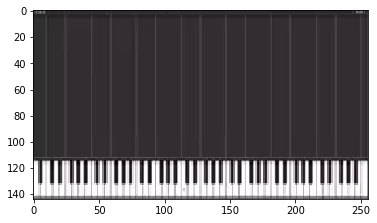

In [3]:
show_frame(frame_num=0)

### So, the piano black & white keys can be monitored at pixel row # of 120. Or, ~85% of the way down from each frame. Now, convert the frame images to grayscale, then print the matrix of the two adjacent frames that show piano key transitions (frame# 164 & 165)

frame_#: 164


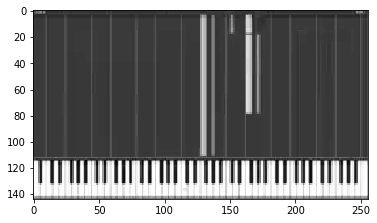

upper_piano_slice: [165 255 255 255 105  20  33 185 255 220 220 255 230  79  23  53 220 255
 232  68  27  60 229 255 206 233 255 216  43  14  85 238 252  97  16  36
 195 255 184  37  25 121 255 248 179 249 255 148  36  23 160 255 255 135
  29  31 170 255 228 212 255 244  96  29  45 199 255 173  39  17 131 255
 237  71  17  57 229 255 200 229 255 199  57  19  85 249 255 194  44  22
 101 245 254 180 250 255 159  28  18 131 255 230  65  35  58 224 255 137
  31  29 165 255 233 206 255 254  92  29  37 201 255 244  86  31  47 203
 255 210 212 255 224  60  30  63 231 255 120  22  22 172 255 201  53  23
  90 245 251 177 254 255 160  35  17 123 252 255 152  35  26 136 254 245
 193 254 255 111  22  26 180 255 198  43  17 103 248 255  87  24  39 194
 255 213 213 255 223  59  24  60 226 255 223  63  26  75 238 255 187 234
 255 195  45  23 106 251 238  81  28  38 209 255 153  36  14 132 254 254
 187 255 251 125  32  37 171 255 249 111  29  36 179 255 222 200 255 242
  77  31  52 209 255 155  28  32

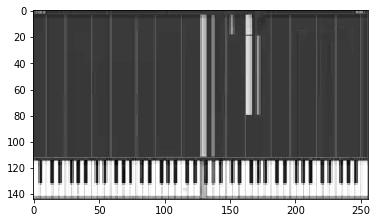

upper_piano_slice: [165 255 255 255 105  20  33 185 255 220 220 255 230  79  23  53 220 255
 232  68  27  60 229 255 206 233 255 216  43  14  85 238 252  97  16  36
 195 255 184  37  25 121 255 248 179 249 255 148  36  23 160 255 255 135
  29  31 170 255 228 212 255 244  96  29  45 199 255 173  39  17 131 255
 237  71  17  57 229 255 200 229 255 199  57  19  85 249 255 194  44  22
 101 245 254 180 250 255 159  28  18 131 255 230  65  35  58 224 255 137
  31  29 165 255 233 206 255 254  92  29  37 201 255 244  86  31  47 203
 255 210 120 148 145  49  31  64 231 255 155  92  78 180 255 202  54  24
  90 245 251 177 254 255 160  35  17 123 252 255 152  35  26 136 254 245
 193 254 255 111  22  26 180 255 198  43  17 103 248 255  87  24  39 194
 255 213 213 255 223  59  24  60 226 255 223  63  26  75 238 255 187 234
 255 195  45  23 106 251 238  81  28  38 209 255 153  36  14 132 254 254
 187 255 251 125  32  37 171 255 249 111  29  36 179 255 222 200 255 242
  77  31  52 209 255 155  28  32

In [159]:
cap = cv2.VideoCapture('144p_Tutorial_Clair_de_Lune.mp4')
counter = 0
prev_upper_piano_slice = np.array([])
prev_lower_piano_slice = np.array([])
while cap.isOpened() and counter <= 168:
    ret, current_frame = cap.read()
    current_frame = cv2.cvtColor(current_frame, cv2.COLOR_BGR2GRAY)
    upper_piano_slice = current_frame[120,]
    lower_piano_slice = current_frame[140,]
    if counter >= 164 and counter <= 165:
        print(f'frame_#: {counter}')
        plt.imshow(current_frame, cmap='Greys_r')
        plt.show()
        upper_piano_diff = upper_piano_slice - prev_upper_piano_slice
        lower_piano_diff = lower_piano_slice - prev_lower_piano_slice
        print(f'upper_piano_slice: {upper_piano_slice}')
        print(f'upper_piano_diff: {upper_piano_diff}')
        print(f'lower_piano_slice: {lower_piano_slice}')
        print(f'lower_piano_diff: {lower_piano_diff}')
    prev_upper_piano_slice = upper_piano_slice
    prev_lower_piano_slice = lower_piano_slice
    counter += 1

cap.release()
cv2.destroyAllWindows()

### Looks like a grayscale delta greater than 50 can indicate piano key transitions.

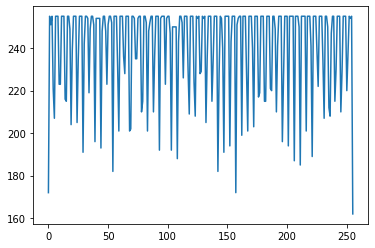

In [3]:
lower_piano_slice = [
 172,255,251,255,221,207,255,255,255,223,223,255,255,255,216,215,255,255
,249,204,239,255,255,255,205,235,255,255,255,191,242,255,255,254,219,249
,255,255,251,196,254,254,254,254,193,248,255,255,248,223,251,255,255,252
,182,255,255,255,231,201,255,255,255,236,228,255,255,255,201,202,255,255
,254,235,235,254,255,255,210,215,255,255,252,201,248,252,255,255,210,236
,255,255,255,192,254,255,255,255,223,254,255,255,247,192,250,250,250,250
,188,243,255,255,252,226,255,255,255,230,209,255,255,255,224,208,255,254
,255,228,229,255,254,255,205,235,255,255,255,215,234,255,255,255,182,228
,255,254,240,191,255,255,255,255,194,243,255,255,255,172,251,254,255,255
,199,255,255,255,228,201,255,255,255,240,203,255,255,255,217,219,255,255
,255,215,215,255,255,255,221,220,255,255,249,210,241,255,255,255,196,227
,255,255,255,194,255,255,255,255,187,255,255,255,250,185,255,255,255,255
,201,255,255,255,241,189,255,255,255,238,222,255,255,255,234,207,255,255
,250,212,208,247,255,255,215,230,255,255,255,210,229,255,255,255,220,238
,255,254,255,162]

plt.plot(lower_piano_slice)
plt.show()

In [60]:
cap = cv2.VideoCapture('144p_Tutorial_Clair_de_Lune.mp4')
length = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
cap.release()
cv2.destroyAllWindows()
print(length)

7673


### This video is ~256 seconds.
### So this video is indeed 30fps (7673 frames / 256 seconds)

### As a first naive filter, try to print all frames that have pixels of piano keys (pixel row of 120) different from those of previous frames.

150
diff: [  0   0   0   0   5 251 251   6   0   0   0   0   3   4   4   3   0   0
   0   0   3 247   6   0   3   3   0   2 255 255 255 254 254 244 244 255
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0 255  21   0   3   3   4   6 252   0 252 253 250   6   7
   4 246 247   1   7   1   4   5   0 246   5 249 248 254   0   0   8   5
  11 250 255   6   1   0   6 255 255   4   0   3 248   7 248 251   0   2
 249   3   1   0 244   1   0   3 253  12 255  17   0   3 249   1   1 252
   0 251 248   0   5 248 254   0   3   0 254 249 249   3   0   0 255 254
 246 253 253 246   9   0   1 251   1 250 253   0   0   4   4   2 255 251
 250 255   0 251 249 253 252   0   3 255 252   2   7   1   1 248 249 250
   0   4   4   0 249 250 255 250 254   0   4 255   0   0   0   0   1   1
   0   1   0   0   0   0 252 252 253 252   3   0 250   3 241   4 255   4
 250   7 252 253   2   0   4   3 250 250   3   7 255   0   1 251   0   5
 249   7   0 243   0   7   2   1   1   0 

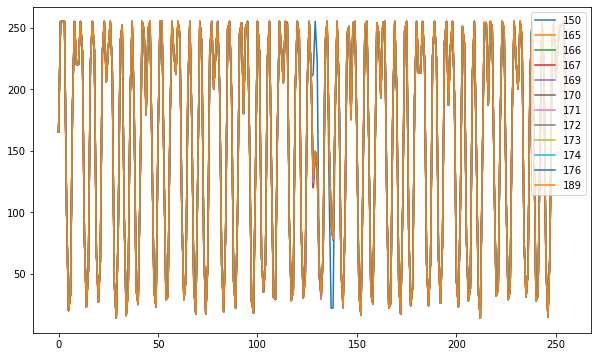

In [110]:
cap = cv2.VideoCapture('144p_Tutorial_Clair_de_Lune.mp4')

piano_keys_height = 120 # the pixel row # in which the piano keys occur
counter = 0
prev_piano_keys_pixels = np.array([])

plt.figure(figsize=(10,6))
while cap.isOpened() and counter < 190:
    ret, current_frame = cap.read()
    current_frame_gray = cv2.cvtColor(current_frame, cv2.COLOR_BGR2GRAY)
    current_piano_keys_pixels = current_frame_gray[piano_keys_height,]
    
    if not(np.array_equal(prev_piano_keys_pixels, current_piano_keys_pixels)) and counter > 0:
        print(counter)
        print('diff:', current_piano_keys_pixels - prev_piano_keys_pixels)
        plt.plot(current_piano_keys_pixels, label=counter)
    
    prev_piano_keys_pixels = current_piano_keys_pixels
    counter += 1
    
plt.legend(loc='upper right')
plt.show()
cap.release()
cv2.destroyAllWindows()

### Check frames to verify result

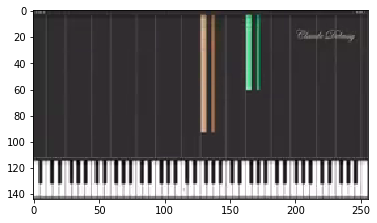

In [18]:
show_frame(frame_num=149)

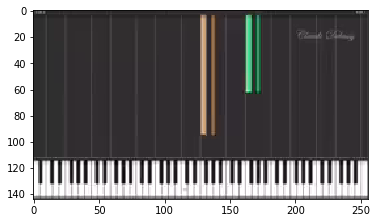

In [94]:
show_frame(frame_num=150)

### Looks like something odd is happening.
### Visually the piano keys didn't change color. Likely some noise in the frames 149 & 150 was detected.

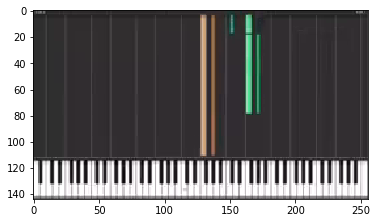

In [95]:
show_frame(frame_num=164)

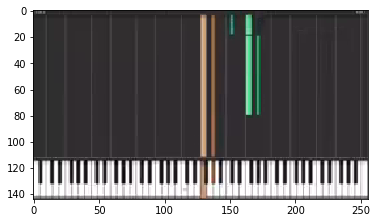

In [97]:
show_frame(frame_num=165)

### The transition from 164 to 165 was correctly pointed out.

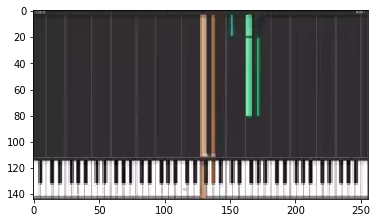

In [107]:
show_frame(frame_num=166)

### The transition from 165 to 166 contains no piano key change. Likely some noise in the frame was the culprit.

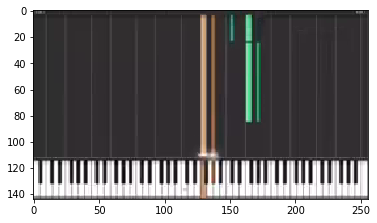

In [102]:
show_frame(frame_num=170)

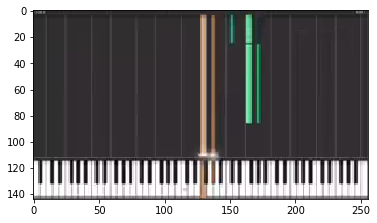

In [103]:
show_frame(frame_num=171)

### Same story here. Looks like we need a better filter for the video.
### Since the numpy array representing the grayscale frames are uint8, subtracting 255 from 1 between two neighboring frames causes odd values when filtering. Halving the grayscale pixel values prior to subtraction did the trick.

In [12]:
def piano_filter(current_piano_keys_pixels,
                 prev_piano_keys_pixels):
    mod_current = current_piano_keys_pixels/2
    mod_prev = prev_piano_keys_pixels/2
    diff_pixels = abs(mod_current - mod_prev)
    if sum(diff_pixels > 25) > 3: # In case of noise in low-resolution videos
        return True
    else:
        return False

In [4]:
def get_new_keystroke_frame_numbers(vid_file = '144p_Tutorial_Clair_de_Lune.mp4',
                                    show_visuals = False):

    frame_nums = []
    cap = cv2.VideoCapture(vid_file)
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    piano_keys_height = int(0.85 * height) # the reasonable pixel row # in which the piano keys occur
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    prog_bar = tqdm_notebook(total= total_frames - 2)
    counter = 0
    prev_frame_gray = np.array(np.zeros([height, width]))
    prev_piano_keys_pixels = np.array(np.zeros(width))

    while cap.isOpened() and counter < total_frames - 1:
        ret, current_frame = cap.read()
        current_frame_gray = cv2.cvtColor(current_frame, cv2.COLOR_BGR2GRAY)
        current_piano_keys_pixels = current_frame_gray[piano_keys_height,]

        if piano_filter(current_piano_keys_pixels,
                        prev_piano_keys_pixels):
            frame_nums.append(counter)
            if show_visuals:
                print('\n---------------------\n')
                plt.figure(figsize=(12,7.5))
                plt.title(f'Previous Frame #: {counter - 1}')
                plt.imshow(prev_frame_gray, cmap='Greys_r')
                plt.show()
                plt.figure(figsize=(12,7.5))
                plt.title(f'Current Frame #: {counter}')
                plt.imshow(current_frame_gray, cmap='Greys_r')
                plt.show()
                
        prev_frame_gray = current_frame_gray
        prev_piano_keys_pixels = current_piano_keys_pixels
        counter += 1
        prog_bar.update(1)
        
    cap.release()
    cv2.destroyAllWindows()
    prog_bar.close()
    
    return frame_nums

In [5]:
piano_key_change_frames = get_new_keystroke_frame_numbers()

In [6]:
print(piano_key_change_frames)

[0, 165, 193, 246, 287, 298, 311, 324, 399, 413, 425, 437, 457, 496, 515, 529, 541, 553, 641, 654, 666, 678, 690, 702, 713, 725, 736, 749, 761, 771, 807, 842, 867, 879, 890, 902, 914, 925, 937, 949, 961, 973, 984, 1019, 1069, 1083, 1094, 1110, 1151, 1190, 1203, 1215, 1227, 1303, 1315, 1327, 1342, 1380, 1418, 1430, 1442, 1456, 1493, 1531, 1544, 1556, 1570, 1591, 1624, 1631, 1649, 1662, 1673, 1686, 1707, 1782, 1802, 1833, 1855, 1856, 1868, 1890, 1891, 1903, 1925, 1926, 1943, 1964, 2006, 2026, 2057, 2067, 2079, 2089, 2090, 2101, 2112, 2123, 2124, 2136, 2146, 2147, 2163, 2166, 2185, 2225, 2242, 2257, 2272, 2289, 2305, 2321, 2333, 2351, 2352, 2371, 2372, 2383, 2414, 2429, 2444, 2459, 2475, 2490, 2506, 2517, 2555, 2556, 2566, 2595, 2612, 2627, 2642, 2657, 2673, 2689, 2700, 2718, 2719, 2738, 2748, 2758, 2759, 2768, 2774, 2836, 2870, 2933, 2987, 3002, 3008, 3018, 3029, 3033, 3039, 3050, 3065, 3070, 3082, 3097, 3103, 3113, 3123, 3127, 3133, 3143, 3157, 3163, 3172, 3191, 3200, 3205, 3209, 3215, 

In [7]:
piano_key_change_frames[-1]

7586

In [8]:
len(piano_key_change_frames)

605

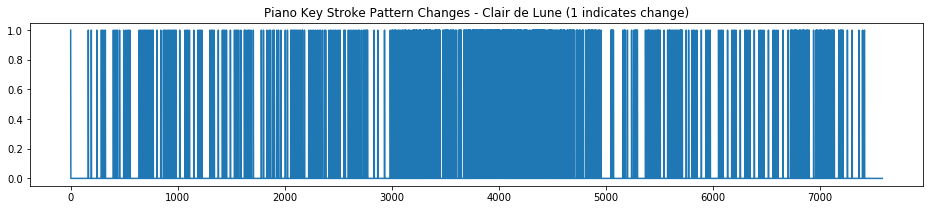

In [29]:
plt.figure(figsize=(16,3))
plt.title('Piano Key Stroke Pattern Changes - Clair de Lune (1 indicates change)')
plt.plot(range(piano_key_change_frames[-1]), [1 if x in piano_key_change_frames else 0 for x in range(piano_key_change_frames[-1])])
plt.show()

### Very frequent key transitions from frame ~3000 and ~5000 for Clair de Lune. Could be difficult to learn the piano keys for a beginner.

### Now, write a function to extract just the frames showing piano key transitions.

In [10]:
def write_video_from_selected_frames(input_vid,
                                     frame_nums,
                                     fps,
                                     output_filepath):
    cap = cv2.VideoCapture(input_vid)
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    prog_bar = tqdm_notebook(total= total_frames)
    
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    video = cv2.VideoWriter(output_filepath, -1, fps, (width, height), True)
    
    counter = 0
    
    while cap.isOpened() and counter < total_frames:
        ret, current_frame = cap.read()
        if counter in frame_nums:
            video.write(current_frame)
        counter += 1
        prog_bar.update(1)
    
    cap.release()
    cv2.destroyAllWindows()
    video.release()
    prog_bar.close()

In [28]:
write_video_from_selected_frames(input_vid='144p_Tutorial_Clair_de_Lune.mp4',
                                 frame_nums=piano_key_change_frames,
                                 fps=30,
                                 output_filepath='144p_changes_only_Clair_de_Lune.mp4')

In [26]:
write_video_from_selected_frames(input_vid='720P_Tutorial_Clair_de_Lune.mp4',
                                 frame_nums=piano_key_change_frames,
                                 fps=3,
                                 output_filepath='720p_changes_only_3fps_Clair_de_Lune.mp4')

In [8]:
write_video_from_selected_frames(input_vid='720P_Tutorial_Clair_de_Lune.mp4',
                                 frame_nums=piano_key_change_frames,
                                 fps=1,
                                 output_filepath='720P_Changes_Only_1fps_v1_Clair_de_Lune.mp4')

In [16]:
def write_video_from_selected_frames_v1(input_vid,
                                        frame_nums,
                                        fps,
                                        output_filepath):
    cap = cv2.VideoCapture(input_vid)
    prog_bar = tqdm_notebook(total= len(frame_nums))
    
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    video = cv2.VideoWriter(output_filepath, -1, fps, (width, height), True)
    
    for frame_num in frame_nums:
        cap.set(1, frame_num)
        ret, frame = cap.read()
        video.write(frame)
        prog_bar.update(1)
    
    cap.release()
    cv2.destroyAllWindows()
    video.release()
    prog_bar.close()

In [17]:
write_video_from_selected_frames_v1(input_vid='720P_Tutorial_Clair_de_Lune.mp4',
                                    frame_nums=piano_key_change_frames,
                                    fps=1,
                                    output_filepath='720P_Changes_Only_1fps_v1_Clair_de_Lune.mp4')

### Using cap.set() method is a lot slower. It looks like it riffles to the beginning of the frames everytime when the cap.set() method is called. Lesson learned, the hard way.

### Now, putting the two previous functions together, a video can automatically be converted to one that only shows key transitions, at fixed intervals.

In [14]:
def compile_piano_key_stroke_video(input_vid,
                                   fps,
                                   fps_multiplier, # if > 1fps, usually set this to 1. If < 1fps is desired, set this to 0.5, with fps=1 to get 0.5fps
                                   output_filepath):
    cap = cv2.VideoCapture(input_vid)
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    
    piano_keys_height = int(0.85 * height) # the reasonable pixel row # in which the piano keys occur
    
    prev_frame_gray = np.array(np.zeros([height, width]))
    prev_piano_keys_pixels = np.array(np.zeros(width))
    
    video = cv2.VideoWriter(output_filepath, -1, fps, (width, height), True)
    
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    prog_bar = tqdm_notebook(total= total_frames)
    counter = 0
    
    while cap.isOpened() and counter < total_frames:
        ret, current_frame = cap.read()
        # Conver to grayscale to allow easier comparison, regardless of what color scheme the video contains
        current_frame_gray = cv2.cvtColor(current_frame, cv2.COLOR_BGR2GRAY)
        # Get piano keys pixels (just one horizontal row would do)
        current_piano_keys_pixels = current_frame_gray[piano_keys_height,]
        
        if piano_filter(current_piano_keys_pixels,
                        prev_piano_keys_pixels):
            for i in range(int(1/fps_multiplier)):
                video.write(current_frame)
            
        prev_frame_gray = current_frame_gray
        prev_piano_keys_pixels = current_piano_keys_pixels
        counter += 1
        prog_bar.update(1)
    
    cap.release()
    cv2.destroyAllWindows()
    video.release()
    prog_bar.close()


In [64]:
compile_piano_key_stroke_video(input_vid='144p_Tutorial_Clair_de_Lune.mp4',
                               fps=1,
                               fps_multiplier=1,
                               output_filepath='144p_Changes_Only_1fps_Tutorial_Clair_de_Lune.mp4')

In [65]:
compile_piano_key_stroke_video(input_vid='144p_Tutorial_Clair_de_Lune.mp4',
                               fps=1,
                               fps_multiplier=0.5,
                               output_filepath='144p_Changes_Only_half_fps_Tutorial_Clair_de_Lune.mp4')

In [66]:
compile_piano_key_stroke_video(input_vid='1080P_Tutorial_Gymnopedie.mp4',
                               fps=1,
                               fps_multiplier=0.5,
                               output_filepath='1080p_Changes_Only_half_fps_Tutorial_Gymnopedie.mp4')

In [67]:
compile_piano_key_stroke_video(input_vid='720P_Tutorial_Clair_de_Lune.mp4',
                               fps=1,
                               fps_multiplier=0.5,
                               output_filepath='720p_Changes_Only_half_fps_Clair_de_Lune.mp4')

In [6]:
compile_piano_key_stroke_video(input_vid='144p_Tutorial_Clair_de_Lune.mp4',
                               fps=1,
                               fps_multiplier=0.5,
                               output_filepath='144p_Changes_Only_half_fps_Clair_de_Lune.mp4')

In [56]:
gymnope_piano_key_change_frames = get_new_keystroke_frame_numbers(vid_file='1080P_Tutorial_Gymnopedie.mp4')
len(gymnope_piano_key_change_frames)

675

In [15]:
compile_piano_key_stroke_video(input_vid='1080P_Tutorial_Gymnopedie.mp4',
                               fps=1,
                               fps_multiplier=0.25,
                               output_filepath='1080p_Changes_Only_qtr_fps_Tutorial_Gymnopedie.mp4')

In [17]:
compile_piano_key_stroke_video(input_vid='720P_Tutorial_Clair_de_Lune.mp4',
                               fps=1,
                               fps_multiplier=0.33,
                               output_filepath='720p_Changes_Only_third_fps_Clair_de_Lune.mp4')

### The new piano video output is much easier to follow along.
### Though, I hope you quickly grow out of the need to use such a nerdy script. If you wish to learn piano, put some time into it and you'll possibly no longer be a beginner. Also, the pace of the piano music is important to learn too!